In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
data = pd.read_csv("Real estate.csv")
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [50]:
data.shape

(414, 8)

In [51]:
data.set_index("No",inplace=True)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


In [53]:
data['X1 transaction date'] = data['X1 transaction date'].astype(int)

In [54]:
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012,5.0,390.56840,5,24.97937,121.54245,43.1


In [55]:
# Check for Missing Values & Outliers
print (data.isnull().sum())

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


# Step 2 : Separate Input and out features

In [56]:
X = data.drop("Y house price of unit area",axis=1)
y = data["Y house price of unit area"]

In [57]:
X

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
No,,,,,,
1,2012,32.0,84.87882,10,24.98298,121.54024
2,2012,19.5,306.59470,9,24.98034,121.53951
3,2013,13.3,561.98450,5,24.98746,121.54391
4,2013,13.3,561.98450,5,24.98746,121.54391
5,2012,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
410,2013,13.7,4082.01500,0,24.94155,121.50381
411,2012,5.6,90.45606,9,24.97433,121.54310
412,2013,18.8,390.96960,7,24.97923,121.53986


In [58]:
y

No
1      37.9
2      42.2
3      47.3
4      54.8
5      43.1
       ... 
410    15.4
411    50.0
412    40.6
413    52.5
414    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [61]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [74]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Linear Regression**

In [75]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [76]:
y_pred_train = lr.predict(X_train)
y_pred_train

array([38.9558103 , 34.64668623, 32.07160385, 40.56620992, 45.030863  ,
       34.16506099, 39.62870992, 15.0900296 , 41.15013541, 42.5724862 ,
       47.46877641, 45.94462925, 40.20030603, 33.7175577 , 43.61439494,
       31.62680108, 46.21767413, 30.64678275, 33.50866741, 43.00562393,
       32.3776698 , 47.64242617, 50.49092447, 29.73495046, 26.39967726,
       41.20535785, 39.21992185, 35.70984024, 39.51176212, 47.89157552,
       46.77503048, 19.91210329, 41.14914002, 46.64541131, 43.99958068,
       31.08059593, 31.01579405, 45.302412  , 14.237911  , 51.08923312,
       48.59696745, 39.87770689, 46.29342242, 14.79065259, 48.19168184,
       12.92803892, 30.6606791 , 34.30402519, 40.86891166, 45.51253975,
       40.1278445 , 35.67405533, 32.70987125, 39.17977594, 28.23823929,
       33.42162541, 24.13648554, 37.93079495, 43.37228112, 52.28896017,
       37.62058258, 46.53496645, 40.72691991, 42.61120067, 43.61223078,
       45.79518854, 31.8376031 , 43.78313499, 30.08960201, 40.15

In [77]:
print("Linear Regression:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")
print(f"R²: {r2_score(y_train, y_pred_train):.2f}")

Linear Regression:
RMSE: 9.17
R²: 0.55


# **Ridge Regression**

In [78]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_train_ridge = ridge.predict(X_train)

print("\nRidge Regression:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train_ridge)):.2f}")
print(f"R²: {r2_score(y_train, y_pred_train_ridge):.2f}")


Ridge Regression:
RMSE: 9.47
R²: 0.52


# **Lasso Regression**

In [79]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_train_lasso = lasso.predict(X_train)

print("\nLasso Regression:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train_lasso)):.2f}")
print(f"R²: {r2_score(y_train, y_pred_train_lasso):.2f}")


Lasso Regression:
RMSE: 9.49
R²: 0.52


# **Polynomial Regression**

In [80]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Train model on polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

# Predict on training data (must use transformed features)
y_pred_train_poly = lr_poly.predict(X_train_poly)

# Evaluate
print("\nPolynomial Regression (Degree=2):")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train_poly)):.2f}")
print(f"R2 Score: {lr_poly.score(X_train_poly, y_train):.2f}")



Polynomial Regression (Degree=2):
RMSE: 7.78
R2 Score: 0.68


 # **Random Forest Regression**

In [81]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_train)

print("\nRandom Forest Regression:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_rf)):.2f}")
print(f"R²: {r2_score(y_train, y_pred_rf):.2f}")


Random Forest Regression:
RMSE: 3.28
R²: 0.94


# **Gradient Boosting** 

In [82]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [83]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_train)

print("\nXGBoost Regression:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_xgb)):.2f}")
print(f"R²: {r2_score(y_train, y_pred_xgb):.2f}")


XGBoost Regression:
RMSE: 1.77
R²: 0.98


# **Feature Importance Analysis**

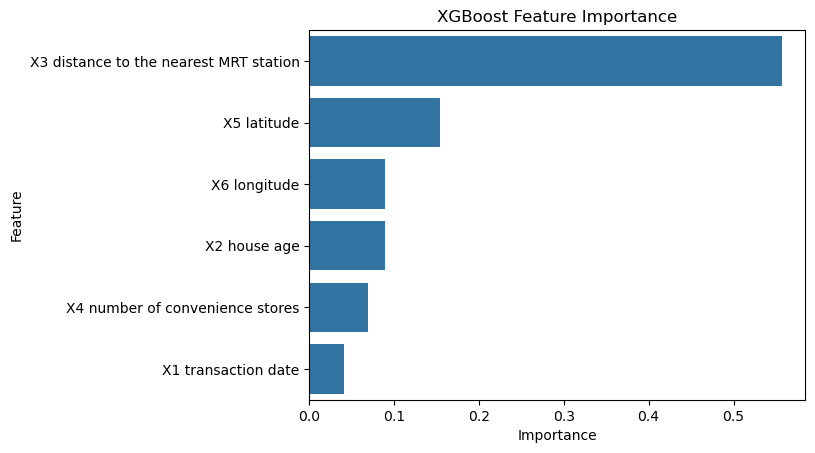

In [84]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb.feature_importances_
}).sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("XGBoost Feature Importance")
plt.show()

 # **Prediction on Test**

# **Linear Regression**

In [126]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_test, y_test)

LinearRegression()

In [127]:
y_pred_test = lr.predict(X_test)
y_pred_test

array([46.40444121, 47.09992633, 47.5789669 , 47.5789669 , 45.79662271,
       31.72987445, 39.08120357, 46.39116284,  8.59375138, 34.37576805,
       34.59100062, 53.14382999, 39.89833076, 27.52036498, 44.92243137,
       36.64305881, 51.21047775, 37.08514037, 46.2334004 , 47.97683612,
       34.97754257, 49.02894693, 27.74779286, 49.13883618, 36.35862593,
       33.23738686, 46.67252482, 42.30403532, 41.79568016, 46.94598343,
       12.55817339, 40.64144282, 30.42574449, 46.79814781, 47.20294636,
       32.98931342, 29.68771783, 31.42675186, 44.86264944, 46.70726839,
       16.15492877, 15.68216256, 35.87482988, 40.24041675, 46.34601437,
       40.90869733, 46.31321411, 36.03232695, 12.31754805, 10.10106045,
       41.25377019, 24.78087803, 33.55330918, 42.75312043, 46.7347407 ,
       22.51531364, 42.87375266, 44.9324104 , 12.79101625, 41.74877978,
       33.60678338, 49.518435  , 28.94678015, 46.37348668, 32.91665731,
       43.02160871, 48.67648854, 46.08707565, 42.72658684, 44.86

In [128]:
print("Linear Regression:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_test):.2f}")

Linear Regression:
RMSE: 8.80
R²: 0.58


# **Ridge Regression**

In [129]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_test, y_test)
y_pred_test_ridge = ridge.predict(X_test)


In [130]:
y_pred_test_ridge = ridge.predict(X_test)

print("\nRidge Regression:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_test_ridge):.2f}")


Ridge Regression:
RMSE: 9.08
R²: 0.55


# **Lasso Regression**

In [131]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_test, y_test)

Lasso(alpha=0.1)

In [132]:
y_pred_test_lasso = lasso.predict(X_test)

print("\nLasso Regression:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_test_lasso):.2f}")


Lasso Regression:
RMSE: 9.10
R²: 0.55


# **Polynomial Regression**

In [133]:
poly = PolynomialFeatures(degree=2)
X_test_poly = poly.fit_transform(X_test)

# Train model on polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_test_poly, y_test)

LinearRegression()

In [134]:
poly = PolynomialFeatures(degree=2)
X_test_poly = poly.fit_transform(X_test)

# Train model on polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_test_poly, y_test)

# Predict on training data (must use transformed features)
y_pred_test_poly = lr_poly.predict(X_test_poly)

# Evaluate
print("\nPolynomial Regression (Degree=2):")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test_poly)):.2f}")
print(f"R2 Score: {lr_poly.score(X_test_poly, y_test):.2f}")



Polynomial Regression (Degree=2):
RMSE: 7.44
R2 Score: 0.70


 # **Random Forest Regression**

In [135]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_test, y_test)
y_test_rf = rf.predict(X_test)

print("\nRandom Forest Regression:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_rf)):.2f}")
print(f"R²: {r2_score(y_test, y_test_rf):.2f}")


Random Forest Regression:
RMSE: 3.13
R²: 0.95


# **Gradient Boosting** 

In [136]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_test, y_test)
y_test_xgb = xgb.predict(X_test)

print("\nXGBoost Regression:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_xgb)):.2f}")
print(f"R²: {r2_score(y_test, y_test_xgb):.2f}")


XGBoost Regression:
RMSE: 1.93
R²: 0.98
